In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/Cars.csv")
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [4]:
df["seller_type"].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [5]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
df['owner'].isnull().unique()

array([False])

In [7]:
#Using manual mapping for the owner column
owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}
print(df['owner'].unique())

df["owner"] = df["owner"].map(owner_mapping)

print(df["owner"].unique())


['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
[1 2 3 4 5]


In [8]:
df["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [9]:
# Removing rows with fuel LPG or CNG.
df = df[~df['fuel'].isin(['LPG', 'CNG'])]
df["fuel"].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [10]:
df["mileage"].head(1)

0    23.4 kmpl
Name: mileage, dtype: object

In [11]:
# Striping kmpl from mileage and converting it into float
df['mileage'] = df['mileage'].astype(str).str.replace('kmpl', '').str.strip().astype(float)
df["mileage"].head(5)

0    23.40
1    21.14
2    17.70
3    23.00
4    16.10
Name: mileage, dtype: float64

In [12]:
# Removing CC from engine column and converting to float.
df['engine'] = df['engine'].astype(str).str.replace('CC', '').str.strip().astype(float)
df["engine"].head(5)

0    1248.0
1    1498.0
2    1497.0
3    1396.0
4    1298.0
Name: engine, dtype: float64

In [13]:
# replacing bhp from max power
df['max_power'] = df['max_power'].astype(str).str.replace('bhp', '').str.strip().astype(float)
df["max_power"].head(5)

0     74.00
1    103.52
2     78.00
3     90.00
4     88.20
Name: max_power, dtype: float64

In [14]:
# Only taking first name of the brand by splitting the name..

print(df['name'].unique())
df['name'] = df['name'].astype(str).str.split(' ').str[0]
print("----------------------------------------------------------")
print(df['name'].unique())

['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
----------------------------------------------------------
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot']


In [15]:
## dropping torque column
## ignoring errors as repeated action will cause column not found error
df = df.drop(columns=['torque'], errors='ignore')
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [16]:
# Test Drive Cars are ridiculously expensive. Since we do not want to
# involve this, we will simply delete all samples related to it.
print(df["owner"].unique())
df = df[~df['owner'].isin(['Test Drive Car'])]
df["owner"].unique()

[1 2 3 4 5]


array([1, 2, 3, 4, 5])

In [17]:
from sklearn.preprocessing import LabelEncoder

features = ["transmission", "fuel", "name", "seller_type"]

for feat in features:
    le = LabelEncoder()
    df[feat] = le.fit_transform(df[feat])

print(df["transmission"].unique())
print(df["fuel"].unique())
print(df["name"].unique())
print(df["seller_type"].unique())

[1 0]
[0 1]
[20 27 10 11 29  9 26 19 28  4  7  6 14 21 22  2 30  3 23 17 13 16 18 31
  5 15  8  0  1 12 24 25]
[1 0 2]


In [18]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

3. Feature Selection

In [19]:
#x is our features
X = df[ ['name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'] ]

# y is selling price (to be predicted).
# y = df["selling_price"]
y = np.log(df['selling_price'])

Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8033 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8033 non-null   int64  
 1   year          8033 non-null   int64  
 2   km_driven     8033 non-null   int64  
 3   fuel          8033 non-null   int64  
 4   seller_type   8033 non-null   int64  
 5   transmission  8033 non-null   int64  
 6   owner         8033 non-null   int64  
 7   mileage       7819 non-null   float64
 8   engine        7819 non-null   float64
 9   max_power     7825 non-null   float64
 10  seats         7819 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 753.1 KB


In [22]:
# from sklearn.linear_model import LinearRegression  #we are using regression models
# from sklearn.metrics import mean_squared_error, r2_score

# lr = LinearRegression()
# lr.fit(X_train, y_train)
# yhat = lr.predict(X_test)

# print("MSE: ", mean_squared_error(y_test, yhat))
# print("r2: ", r2_score(y_test, yhat))

In [23]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,450000,145500,0,1,1,1,23.40,1248.0,74.00,5.0
1,27,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,5.0
2,10,2006,158000,140000,1,1,1,3,17.70,1497.0,78.00,5.0
3,11,2010,225000,127000,0,1,1,1,23.00,1396.0,90.00,5.0
4,20,2007,130000,120000,1,1,1,1,16.10,1298.0,88.20,5.0


Corelation HeatMap

<Axes: >

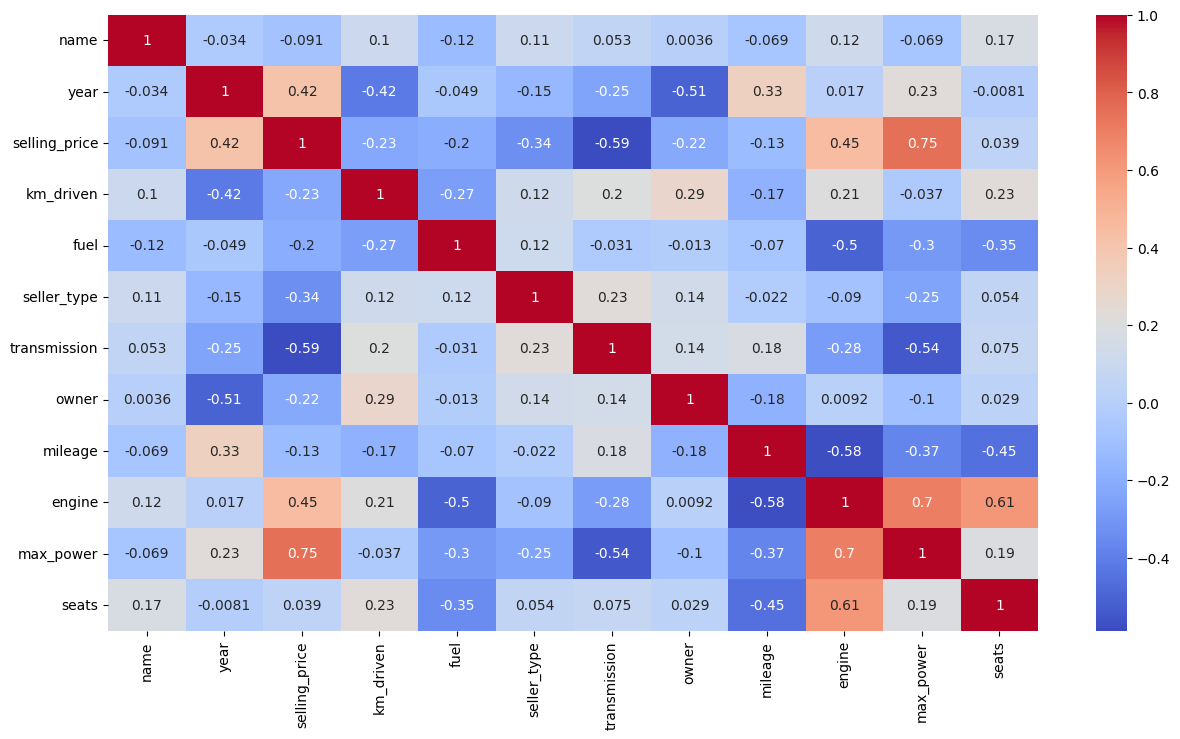

In [24]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

Distribution Plot

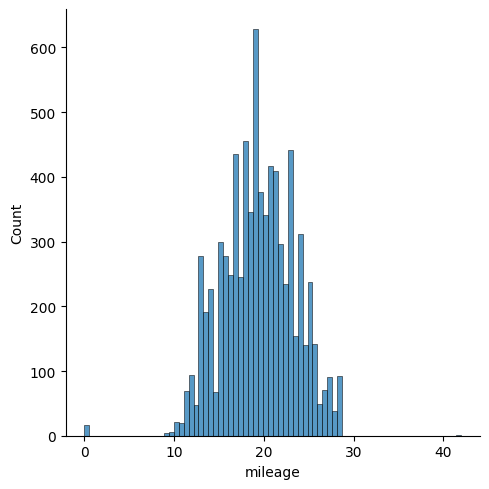

In [25]:
sns.displot(data=df, x='mileage')

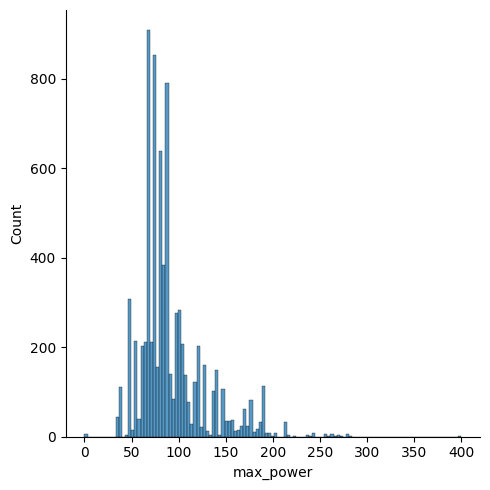

In [26]:
sns.displot(data=df, x='max_power')

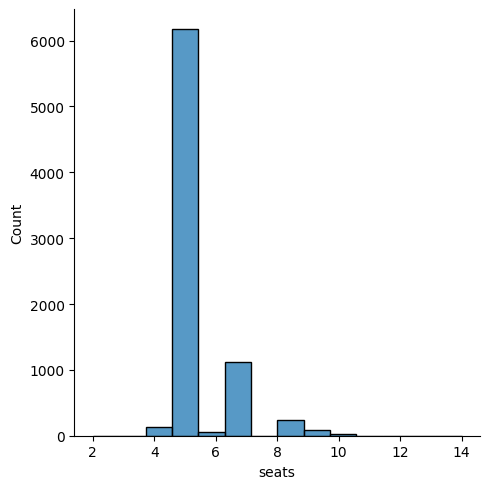

In [27]:
sns.displot(data=df, x='seats')

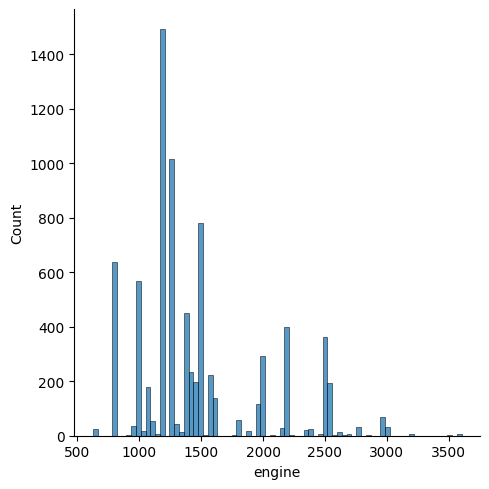

In [28]:
sns.displot(data=df, x='engine')

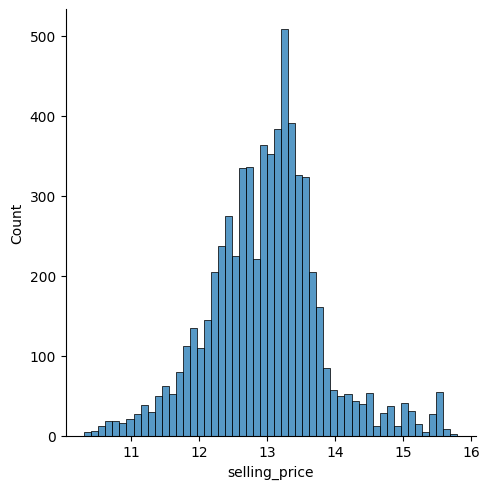

In [29]:
sns.displot(y_train)

ScatterPlot

<Axes: xlabel='mileage', ylabel='selling_price'>

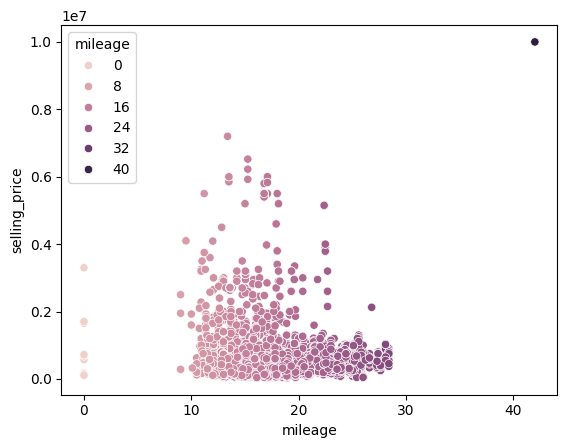

In [30]:
sns.scatterplot(x = df['mileage'], y = df['selling_price'], hue = df['mileage'])

BoxPlot

Text(0.5, 0, 'Km driven')

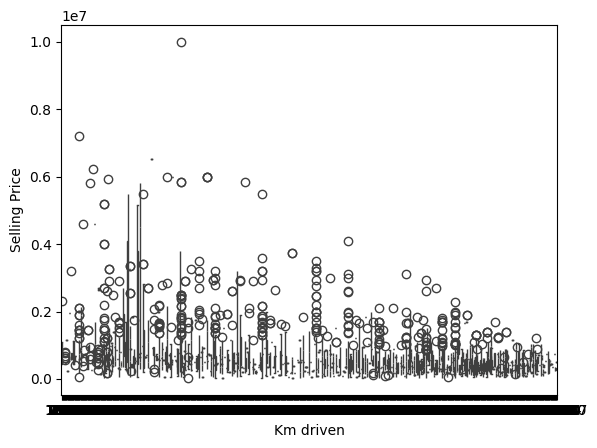

In [31]:
sns.boxplot(x = df["km_driven"], y = df["selling_price"])
plt.ylabel("Selling Price")
plt.xlabel("Km driven")

In [32]:
#check missing values
X_train.isna().sum()

name              0
year              0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage         171
engine          171
max_power       167
seats           171
dtype: int64

In [33]:
## mileage seems to have a normal distribution. so replace NA values with Mean.
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)


## these features seem to have a skewed distribution. So replace NA with Median.
skewed_features = ["engine", "max_power", "seats"]
for _feat in skewed_features:
    X_train[_feat].fillna(X_train[_feat].median(), inplace=True)

/tmp/ipykernel_57380/1678656119.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
/tmp/ipykernel_57380/1678656119.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [34]:
#check missing values again to make sure.
X_train.isna().sum()

name            0
year            0
km_driven       0
fuel            0
seller_type     0
transmission    0
owner           0
mileage         0
engine          0
max_power       0
seats           0
dtype: int64

In [35]:
#Filling test set with the training distribution.

X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

skewed_features_test = ["engine", "max_power", "seats"]
for _feat in skewed_features_test:
    X_test[_feat].fillna(X_train[_feat].median(), inplace=True)

/tmp/ipykernel_57380/2929191158.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
/tmp/ipykernel_57380/2929191158.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [36]:
#for missing y,  you don't replace them, you just delete them.
#don't forget to delete the associated x values as well
y_train_rows_with_na = y_train.isna()
y_train = y_train[~y_train_rows_with_na]
X_train = X_train[~y_train_rows_with_na]

y_test_rows_with_na = y_test.isna()
X_test = X_test[~y_test_rows_with_na]
y_test = y_test[~y_test_rows_with_na]

In [37]:
#check for X_train and X_test na sum again.
print(X_train.isna().sum().unique())
print(X_test.isna().sum().unique())

[0]
[0]


In [38]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
print(X_train[0:1])
X_train = ss.fit_transform(X_train)
X_test  = ss.transform(X_test)


      name  year  km_driven  fuel  seller_type  transmission  owner  mileage  \
3791     4  2013      56315     0            1             1      1    25.44   

      engine  max_power  seats  
3791   936.0       57.6    5.0  


Modeling

In [39]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  0.10099367192235809
r2:  0.859967629107635


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), RandomForestRegressor(n_estimators = 100, random_state = 13)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "Random-Forest Regressor"]

In [41]:
y_train.isna().sum()

np.int64(0)

Cross Validation with K-fold


In [42]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.1072467  -0.09598216 -0.08028811 -0.09395027 -0.09489057]; Mean: -0.0944715616658075
SVR - Score: [-0.05398581 -0.05869914 -0.05912381 -0.06228299 -0.0536269 ]; Mean: -0.0575437290763738
Random-Forest Regressor - Score: [-0.04883725 -0.04255832 -0.04013978 -0.04495127 -0.05133873]; Mean: -0.04556506917810639


Random forest edges out from the rest. So using Grid Search to fine-tune hyper parameteres.

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, 15, 20, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 17)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(random_state=17), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [5, 10, 15, 20, None],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [44]:
grid.best_params_

{'bootstrap': True, 'max_depth': 15, 'n_estimators': 15}

In [45]:
#best score of grid search
best_mse = grid.best_score_
best_mse

np.float64(-0.04711382253618709)

Testing

In [46]:
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

0.04779608519696455

Feature Importance

In [47]:
rf = grid.best_estimator_

rf.feature_importances_

array([0.02017648, 0.45472971, 0.02183046, 0.00452575, 0.00166079,
       0.00198085, 0.00618312, 0.02193036, 0.04144921, 0.4203168 ,
       0.00521647])

<BarContainer object of 11 artists>

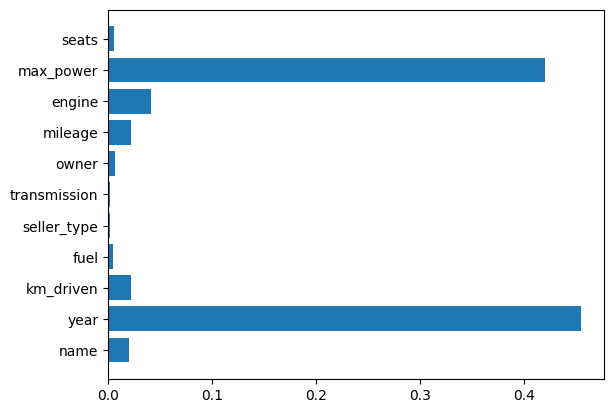

In [48]:
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

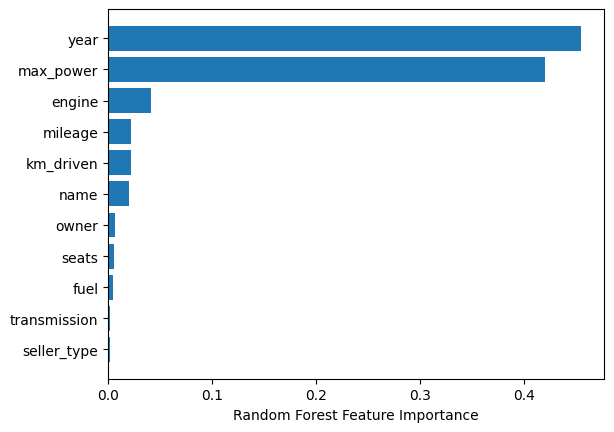

In [49]:
#hmm...let's sort first
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Random Forest Feature Importance')

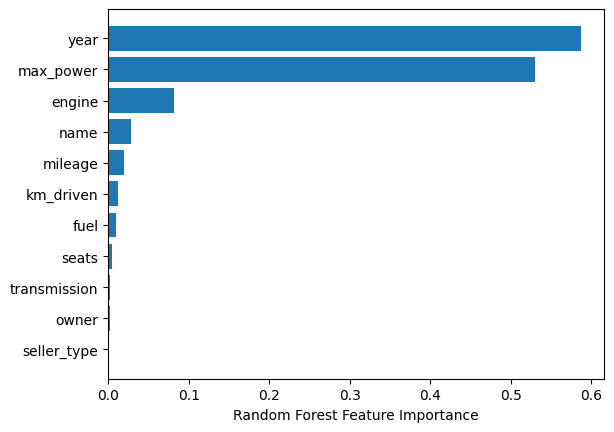

In [50]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

#let's plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

9. Inference
To provide inference service or deploy, it's best to save the model for latter use

In [51]:
import pickle

# save the model to disk
filename = 'model/car_price_predictor'
pickle.dump(grid, open(filename, 'wb'))

In [78]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [79]:
df[['year', 'max_power', 'selling_price']].loc[1]

year               2014.00
max_power           103.52
selling_price    370000.00
Name: 1, dtype: float64

In [80]:
# check for 1st row of X_train data.
sample = X_train[0:1]
pred_selling_price = loaded_model.predict(sample)

#convert back to original scale using exponential.
np.exp(pred_selling_price)
X_train[0:1]

array([[-1.88983352, -0.2083204 , -0.23355602, -0.90461935,  0.27341795,
         0.38379047, -0.63857812,  1.52312779, -1.04266586, -0.96371467,
        -0.42572942]])

In [81]:
np.exp(loaded_model.predict([[5, 1048, 700, 23,1, 1, 2, 1, 145500, 2012, 20]]))

array([4547162.54752671])